In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)+
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/av-healthcare-analytics-ii/healthcare/sample_sub.csv
/kaggle/input/av-healthcare-analytics-ii/healthcare/train_data_dictionary.csv
/kaggle/input/av-healthcare-analytics-ii/healthcare/train_data.csv
/kaggle/input/av-healthcare-analytics-ii/healthcare/test_data.csv


In [2]:
train_dataset = pd.read_csv('/kaggle/input/av-healthcare-analytics-ii/healthcare/train_data.csv')
test_dataset = pd.read_csv('/kaggle/input/av-healthcare-analytics-ii/healthcare/test_data.csv')

train_dataset.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


#### Let me tell you what i am thinking.
For me this is a fun-weekend activity where i am looking at a MajorHealthcare sector problem.
How coool/feasibilie it will be if we get to **predict the hospitalization duration** for a particular patient, right?
We get to:  
- Better medical treatment🩺,
- Precise doctor management and maintaining work-life balance for healtchare-workers💕,
- Generate better revenues💰,
- Get more brand value under a Medical Sector⚡,
- Patient good review

I'll quickly think what we will try to inference out.
Primarily, want to focus on the below point:
- Categories present in target feature **stay**,
    - Find the **age** pattern,
    - Which **department** requires longer stay?
    - Which **hospital code**, on an average sees longer stay?
    - Average **deposit amount** under each *stay category*

In [3]:
print(f"Train Data:{train_dataset.shape}")
print(f"Test Data:{test_dataset.shape}")

Train Data:(318438, 18)
Test Data:(137057, 17)


In [4]:
train_dataset.describe()

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
count,318438.000000,318438.000000,318438.000000,318438.000000,318325.000000,318438.000000,313906.000000,318438.000000,318438.000000
mean,159219.500000,18.318841,4.771717,3.197627,2.625807,65747.579472,7.251859,3.284099,4880.749392
std,91925.276847,8.633755,3.102535,1.168171,0.873146,37979.936440,4.745266,1.764061,1086.776254
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1800.000000
25%,79610.250000,11.000000,2.000000,2.000000,2.000000,32847.000000,4.000000,2.000000,4186.000000
50%,159219.500000,19.000000,5.000000,3.000000,3.000000,65724.500000,8.000000,3.000000,4741.000000
75%,238828.750000,26.000000,7.000000,4.000000,3.000000,98470.000000,8.000000,4.000000,5409.000000
max,318438.000000,32.000000,13.000000,24.000000,4.000000,131624.000000,38.000000,32.000000,11008.000000


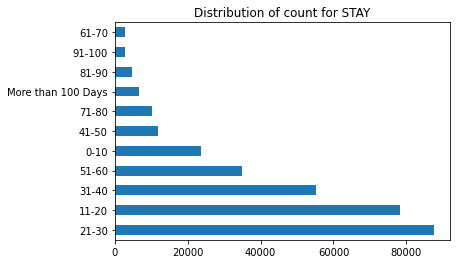

In [5]:
# I though instead of showing values, let's look at a graph and directly infer!
train_dataset.Stay.value_counts().plot(kind = 'barh');
plt.title('Distribution of count for STAY');

In [6]:
# For each Stay Category, trying to look for the AGE distribution
stay_age_distribution = pd.get_dummies(train_dataset.loc[:,['Stay','Age']], columns=['Age']).groupby('Stay', as_index=False).sum()
stay_age_distribution

,Stay,Age_0-10,Age_11-20,Age_21-30,Age_31-40,Age_41-50,Age_51-60,Age_61-70,Age_71-80,Age_81-90,Age_91-100
0,0-10,615.0,1552.0,3467.0,4916.0,4727.0,3427.0,2194.0,2201.0,422.0,83.0
1,11-20,1959.0,5343.0,11272.0,15792.0,14959.0,11346.0,7870.0,7958.0,1392.0,248.0
2,21-30,1489.0,4312.0,11394.0,18550.0,17906.0,13058.0,9033.0,9534.0,1920.0,295.0
3,31-40,1014.0,2681.0,6912.0,10912.0,10983.0,8569.0,5930.0,6420.0,1504.0,234.0
4,41-50,187.0,510.0,1398.0,2373.0,2507.0,1735.0,1205.0,1383.0,379.0,66.0
5,51-60,582.0,1429.0,3793.0,6517.0,7189.0,5739.0,4081.0,4433.0,1082.0,173.0
6,61-70,26.0,89.0,263.0,509.0,562.0,448.0,325.0,378.0,115.0,29.0
7,71-80,153.0,350.0,1026.0,1807.0,2146.0,1710.0,1230.0,1367.0,402.0,63.0
8,81-90,84.0,223.0,546.0,801.0,885.0,784.0,600.0,670.0,216.0,29.0
9,91-100,35.0,71.0,231.0,484.0,578.0,499.0,330.0,386.0,132.0,19.0


In [7]:
now = stay_age_distribution.columns.tolist()
now.remove('Stay')
print(now)

['Age_0-10', 'Age_11-20', 'Age_21-30', 'Age_31-40', 'Age_41-50', 'Age_51-60', 'Age_61-70', 'Age_71-80', 'Age_81-90', 'Age_91-100']


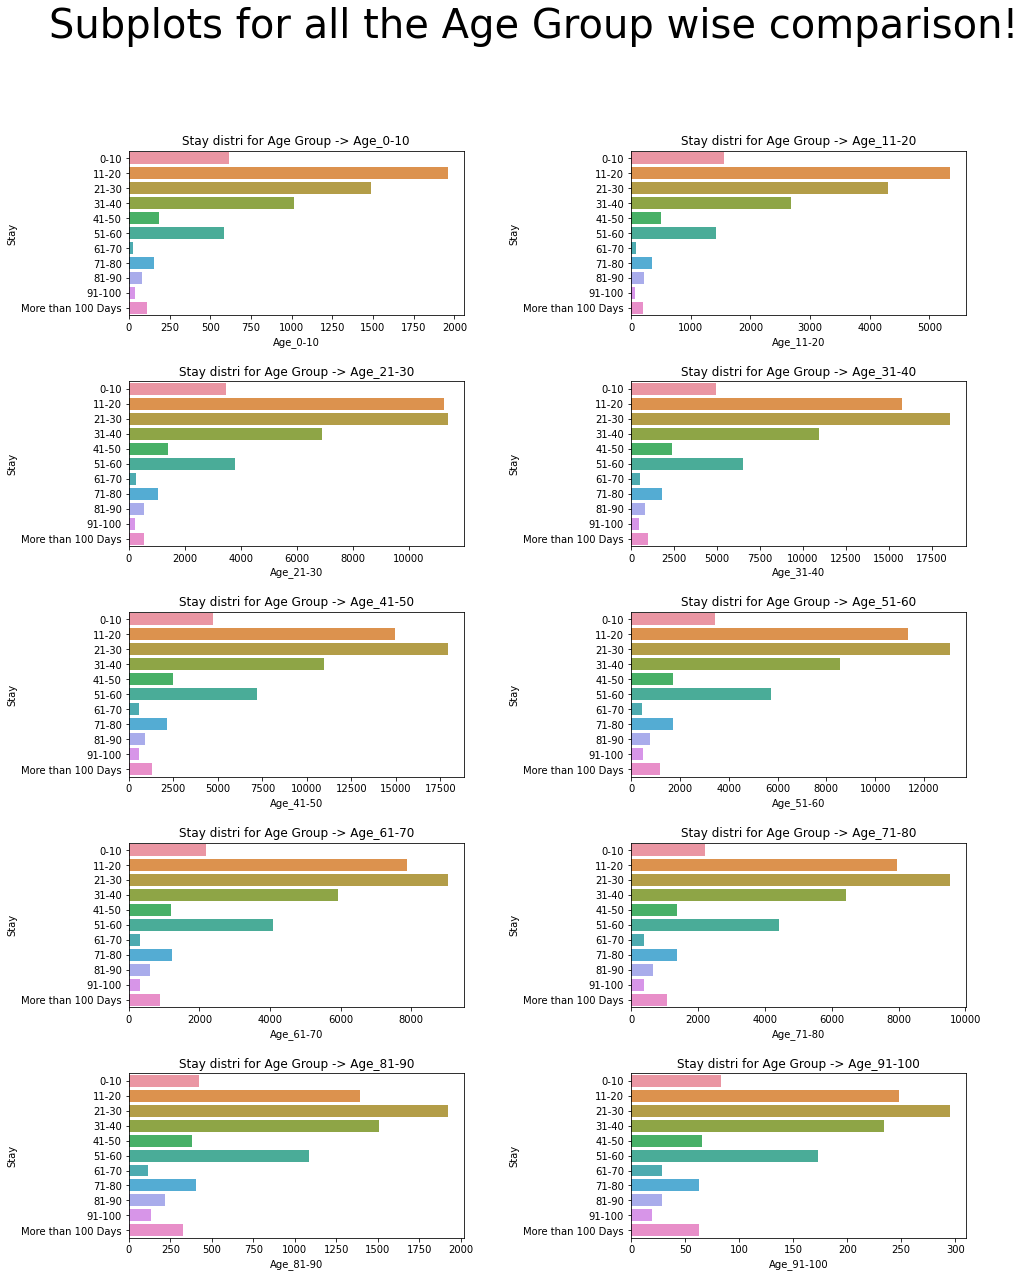

In [8]:
plt.figure(figsize=(15,20))
plt.suptitle("Subplots for all the Age Group wise comparison!", fontsize=40)
x = 1
for age in now:
    ax = plt.subplot(int(len(now)//2),2,x)
    ax = plt.subplots_adjust(wspace=0.5,hspace=0.4)
    sns.barplot(y = 'Stay',x = age,data = stay_age_distribution,ax = ax)
    plt.title(f'Stay distri for Age Group -> {age}')
    x +=1

In [9]:
len(now)//2

5